In [650]:
import numpy as np 
import matplotlib.pyplot as plt

In [651]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### Classifying data has many applications in machine learning. In this example, we'll look at the linear classification LogisticRegression function in scikit-learn.  

In [662]:
# Create blobs of data distributed randomely around a centerpoint
X , y = make_blobs(n_samples = 200, centers = 2, 
                   cluster_std = 3.0)

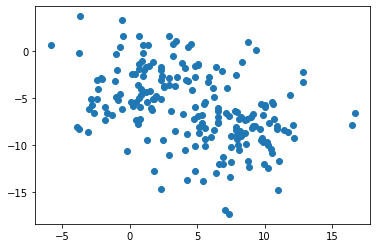

In [663]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [664]:
#Initialize LogisticRegression and set C parameter
logistic = LogisticRegression(C = 1)

In [665]:
#Split the data
X_train , X_test , y_train , y_test = train_test_split(X , y
                                                , random_state = 0)

In [666]:
#Create the model
model_logistic = logistic.fit(X_train, y_train)

In [667]:
#Results
print("Linear Classification Training Score: {}"
      .format(round(model_logistic.score(X_train, y_train) , 3)))

print("Linear Classification Test Score: {}"
      .format(round(model_logistic.score(X_test, y_test), 3)))

Linear Classification Training Score: 0.933
Linear Classification Test Score: 0.92


### Altering the C parameter is equivalent to altering model regularization. 
### In other words, the C parameter can be used to optimize test data accuracy.

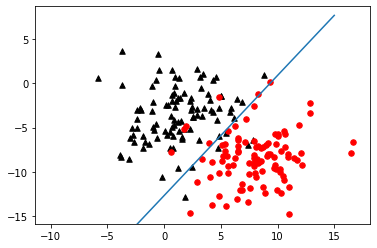

In [681]:
zero = []
one = []
for i, j in zip(range(len(y)) , y):
    if j == 0:
        zero.append(X[i])
    else:
        one.append(X[i])

zero1 = np.array(zero)
one1 = np.array(one)

line = np.linspace(-10,15)

plt.scatter(zero1[:,0] , zero1[:,1] , marker = '^', color = 'k', s = 30)
plt.scatter(one1[:,0] , one1[:,1] , marker = 'o', color = 'r', s = 30)

for coef , intercept in zip(model_logistic.coef_ , model_logistic.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
    plt.ylim(X[:,0].min() - 10 , X[:,1].max() + 5)

### Let's see if we can find a value for C that optimizes the test data score. 

### We can try to optimize the results by running LogisticRegression over many different C values.

Best score: 0.94


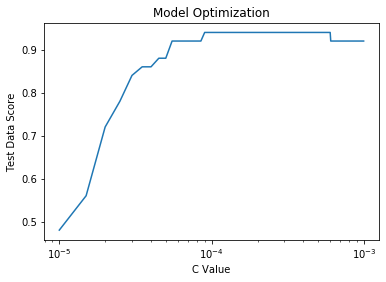

In [689]:
score = []
#create a list of C values 
C_val = np.arange(1E-5 , 1E-3 , 5E-6) 

for k in C_val:
    logi_range = LogisticRegression(C = k)
    model_logistic = logi_range.fit(X_train, y_train)
    score.append(round(model_logistic.score(X_test, y_test), 3))

plt.plot(C_val , score)
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Test Data Score')
plt.title('Model Optimization')
print('Best score: {}'.format(max(score)))

### Now we know that a good value is C $\backsim 10^{-4}$. Using this optimization technique, we were able to determine a value for C that improves the model by almost 2%. This is a simple example with many applications!
### Check this out for more information: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit)